# Working with simple graph data

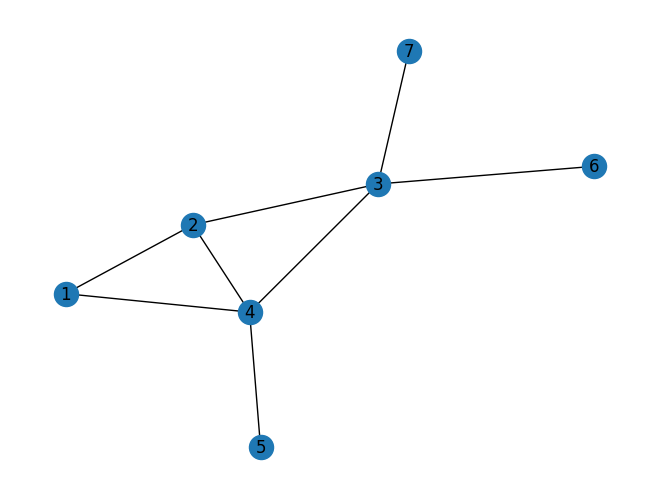

In [23]:
import networkx as nx

# Create a simple graph
G = nx.Graph()

# Add nodes
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)
G.add_node(5)
G.add_node(6)
G.add_node(7)

# Add edges
G.add_edge(1, 2)
G.add_edge(1, 4)
G.add_edge(2, 3)
G.add_edge(2, 4)
G.add_edge(3, 4)
G.add_edge(3, 6)
G.add_edge(3, 7)
G.add_edge(4, 5)

# Draw the graph
nx.draw_spring(G, with_labels=True)


In [15]:
# Betweenness Centrality
betweenness = nx.betweenness_centrality(G)
print("betweenness",betweenness)

# Closeness Centrality
closeness = nx.closeness_centrality(G)
print("closeness",closeness)

# Eigenvector Centrality
eigenvector = nx.eigenvector_centrality(G)
print("eigenvector",eigenvector)

# Degree Centrality
degree = nx.degree_centrality(G)
print("degree",degree)

# K-Core Decomposition
k_core = nx.core_number(G)
print("k_core",k_core)


betweenness {1: 0.0, 2: 0.1, 3: 0.6, 4: 0.43333333333333335, 5: 0.0, 6: 0.0, 7: 0.0}
closeness {1: 0.5, 2: 0.6666666666666666, 3: 0.75, 4: 0.75, 5: 0.46153846153846156, 6: 0.46153846153846156, 7: 0.46153846153846156}
eigenvector {1: 0.36486375634530765, 2: 0.49170712426901436, 3: 0.4860712191302515, 4: 0.5416128697886126, 5: 0.19124263164112748, 6: 0.17163197298906555, 7: 0.17163197298906555}
degree {1: 0.3333333333333333, 2: 0.5, 3: 0.6666666666666666, 4: 0.6666666666666666, 5: 0.16666666666666666, 6: 0.16666666666666666, 7: 0.16666666666666666}
k_core {1: 2, 2: 2, 3: 2, 4: 2, 5: 1, 6: 1, 7: 1}


In [29]:
import networkx as nx

# Create the graph
G = nx.Graph()
edges = [(1, 2), (1, 4), (2, 3), (2, 4), (3, 4), (3, 6), (3, 7), (4, 5)]
G.add_edges_from(edges)

# Calculate betweenness centrality

betweenness_centrality = nx.betweenness_centrality(G, normalized=True, endpoints=False)

# Print betweenness centrality for each node
print("normalized")
for node, centrality in betweenness_centrality.items():
    print(f"Node {node}: Betweenness Centrality = {centrality:.3f}")


print("___________________________________")
betweenness_centrality = nx.betweenness_centrality(G, normalized=False, endpoints=False)
print("not normalized")
for node, centrality in betweenness_centrality.items():
    print(f"Node {node}: Betweenness Centrality = {centrality:.3f}")



normalized
Node 1: Betweenness Centrality = 0.000
Node 2: Betweenness Centrality = 0.100
Node 4: Betweenness Centrality = 0.433
Node 3: Betweenness Centrality = 0.600
Node 6: Betweenness Centrality = 0.000
Node 7: Betweenness Centrality = 0.000
Node 5: Betweenness Centrality = 0.000
___________________________________
not normalized
Node 1: Betweenness Centrality = 0.000
Node 2: Betweenness Centrality = 1.500
Node 4: Betweenness Centrality = 6.500
Node 3: Betweenness Centrality = 9.000
Node 6: Betweenness Centrality = 0.000
Node 7: Betweenness Centrality = 0.000
Node 5: Betweenness Centrality = 0.000
